# Data Visualization - EDA and the grammar of graphics

## Meet Team A

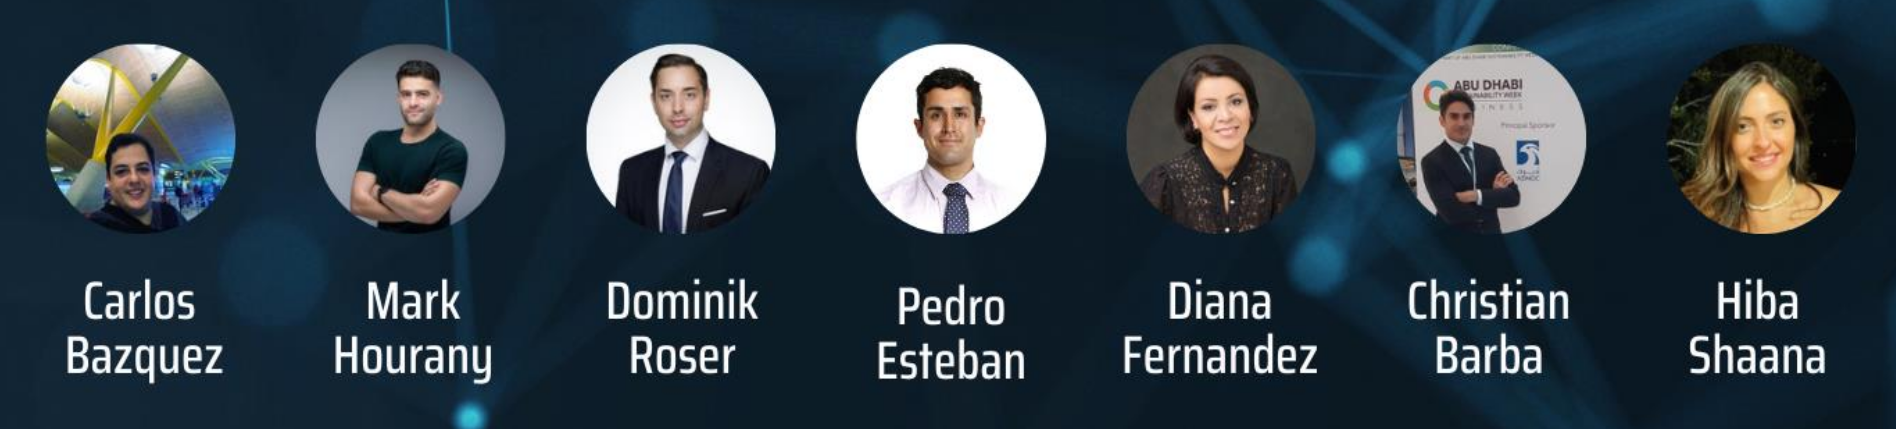

# <font color=black> Table of contents </font>


* [0. Synopsis and libraries](#0)
* [1. Importing Data](#1)
* [2. Preliminary Data Analysis](#2)  
  * [2.1.Data Wrangling](#2.1)
  * [2.2.Ensuring Consistency](#2.2)
  * [2.3.Feature Engineering](#2.2)
  * [2.4.Pandas EDA with final dataset](#2.4)
* [3. GGplot2 EDA (plotnine)](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 Normal Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Annex](#4)



In [1]:
# to be polished

<a id='0'></a>
# <font color=black> 0. Synopsis and Libraries </font>

Before opening their APIs to the public, CitiBank's Chief Digital Officer is keen in exploring new revenue streams to monetize the larges amount of data they've been historically collecting. He knows other financial institutions are doing business with their data, but he still needs to define specific use cases in which his credit card transaction data can add real value. As Senior Data Scientists, the CDO assigns you with the key task of exploring in depth the data stored in your data centers and make a solid assessment of the real value provided by it. You will present this business case in Citibank's annual convention. 

### Pip Installs

In [2]:
#!pip install plotly
#!pip install squarify
#!pip install geopandas
#!pip install dash
#!pip install plotly

### Library Imports

In [3]:
from plotnine import *
from plotnine import ggplot, geom_map, aes, scale_fill_cmap, theme, labs
from plotnine.data import mpg
import pandas as pd
import numpy as np
import plotnine as p9
import squarify
%matplotlib inline
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.io as pio
import os
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

<a id='1'></a>
# <font color=black> 1. Importing Data </font>    

In [4]:
df = pd.read_csv ("madrid_transactions.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'madrid_transactions.csv'

### Making a backup of original dataframe

In [ ]:
df_original = df.copy()

The dataset provided contains more than 10,000 credit card transactions performed by tourists in the city of Madrid during a month. CitiBank's DBA has already cleaned the file and uploaded it to the Campus Online, so you can solely focus on analyzing the different consumption patterns from tourists. The goal is to discover different insights from the data through data visualization (with GGPlot2) and then transform them into potential business outcomes. 

<a id='2'></a>
# <font color=black> 2. Preliminary Data Analysis </font>    

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.describe()

<a id='2.1'></a>
## <font color=black> 2.1. Data Wrangling </font>    

Column Unnamed: 0 must be removed, it adds no value

In [ ]:
del df['Unnamed: 0']

In [ ]:
#columns are now clean
df.head(1)

<a id='2.2'></a>
## <font color=black> 2.2. Ensuring Consistency </font>    

In [ ]:
#making sure we got thurdays and fridays consistent with column tx_date_proc
df.iloc[5700:5800,:]

Dates are consistent with the thursdays and fridays

<a id='2.3'></a>
## <font color=black> 2.3. Feature Engineering </font>    

### 2.3.1 Separation of date and time

In [ ]:
df.tx_date_proc = df.tx_date_proc.apply(pd.to_datetime)

In [ ]:
df['Day'] = [d.date() for d in df['tx_date_proc']]
df['Time'] = [d.time() for d in df['tx_date_proc']]
df.tail(30)

### 2.3.2 Merging with external datasets to have continent 

In [ ]:
country_df = pd.read_csv("country-and-continent-codes-list.csv")

In [ ]:
country_df.head(1)

In [ ]:
df = df.join(country_df.set_index('Two_Letter_Country_Code'), on = 'customer_country')


In [ ]:
df.head(5)

Expanded information about the country and continent

### 2.3.3 Getting rid of useless features

In [ ]:
del df['Three_Letter_Country_Code']

In [ ]:
del df['Country_Number']

In [ ]:
df

<a id='2.4'></a>
## <font color=black> 2.4. Pandas EDA with adjusted dataset </font>    

In [ ]:
df.info()

In [ ]:
df.dtypes

We converted the tx_date_proc column to a pure datetime64 format and added continents

In [ ]:
df.columns

In [ ]:
report = ProfileReport(df, minimal=False)
report

### Conclusions of Pandas profiling and Actions to be taken before EDA?

- Main nationality are Americans followed by French
- Created new features form date and time via split
- Most of sales go to fashion and shoes followed by restauration sector
- Apparently only records for two days, Thursdays and Fridays being the first predominant
- Most active hour seems to be around 18.00 and 19.00
- Have three redundant columns for time or date:
    - daytime
    - hour
    - tx_date_proc

<a id='3'></a>
# <font color=black> 3. GGplot2 EDA (plotnine) </font>    

In [ ]:
#follow report structure and place graphs in same order, rest of grpahs must merge DOminik and Dianas and place in annex

## First chart: Heatmap

In [ ]:
(ggplot(df)
     + aes('hour', 'category')
     + geom_bin2d(bins=20)
     + ggtitle("Most bought category and time")
)


- Bars and Restaurants have activity within Spanish lunch and dinner customs
- Fashion and shoes seem to skyrocket at 3 o clock

# Second chart treemap

In [ ]:
#needs to be finetuned a bit..

In [ ]:

df2 = df.groupby('category').size().reset_index(name='counts')
labels = df2.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df2['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(30,20), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8,text_kwargs={'fontsize':13})

# Decorate
plt.title('Category Treemap ')
plt.axis('off')
plt.show()

## Drilled down to understand which sector is more demanded by which nationality

In [ ]:
fig = px.treemap(df, path=[px.Constant("all"), 'category', 'customer_country'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### And viceversa

In [ ]:
fig = px.treemap(df, path=[px.Constant("all"),'customer_country', 'category'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

### And viceversa by continent

In [ ]:
fig = px.treemap(df, path=[px.Constant("all"),'Continent_Name', 'category'])
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

# Third chart: Pie Chart using the new continent feature engineered by joining a third party dataset

In [ ]:
import plotly.graph_objects as go
values = df["Continent_Name"].value_counts()
labels = df["Continent_Name"].unique().tolist()

In [ ]:
fig = go.Figure(data=[go.Pie(values=values, labels=labels, hole=.2)])

fig.show()
print(values)

In [ ]:


(p9.ggplot(data=df,
           mapping=p9.aes(x='customer_country'))
    + p9.geom_bar()
    + p9.theme_bw()
    + p9.theme(axis_text_x = p9.element_text(angle=90))
)


# Fourth chart: Geographical plot

In [ ]:

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", world.geometry.name)
print("Dataset Size : ", world.shape)
world.head()

In [ ]:
country_code = pd.read_csv ("all.csv")

In [ ]:
country_code.head()

In [ ]:
countries = world.merge(country_code, left_on="iso_a3", right_on="alpha-3")

countries.head()

In [ ]:
df3 = df.groupby('customer_country')['amount'].sum()



In [ ]:
df3

In [ ]:
sales_df = countries.merge(df3, left_on="alpha-2", right_on="customer_country")


In [ ]:
sales_df

### Seaborn graphics, matrix

In [ ]:
df.info()

In [ ]:
sns.set_theme(style="white")

g = sns.PairGrid(df, vars = ['hour','amount'],hue='Continent_Name', diag_sharey=False, palette = 'rainbow_r')
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot,warn_singular=False)
g.map_diag(sns.kdeplot, lw=2,warn_singular=False)
g.add_legend()

# TARGET, ATRACT, RETAIN AND ENGAGE

## GOAL:

Increase credit card usage and spending among Citi credit cardholders visiting the city of Madrid by:

- Creating marketing campaings that will leverage data from their past consumer behavior
- Targeting our customers more precisely through smarter segmentation
- Developing a better value proposition to enhance the customer experience

## DEFINING TARGET AUDIENCE:

We are going to identify the customers with a high propensity to respond to our marketing campaigns. To do so, we will segment our customers based on past spendings, utilization (amount of transactions), average ticket size, total expenditure, expenditure by product category, nationality and daytime spending patterns.

### Lets start undestanding our Customers

In [ ]:
chart = ggplot(data=sales_df, mapping=aes(fill="amount"))
map_proj = geom_map()
labels = labs(title="Total Credit Card Expenditure by Country of Origin")
theme_details = theme(figure_size=(12,6))
fill_colormap = scale_fill_cmap(cmap_name="RdYlGn")
color_colormap = scale_color_cmap(cmap_name="RdYlGn")

world_map_card = chart + map_proj + labels + theme_details + fill_colormap + color_colormap

world_map_card

NOTE: We need and interactive map with 1 drop down and 1 slicer

1. The drop down would allow me to map either
 - Total Expenditure
 - Total Amount of Transactions
 - Average Ticket ( Total Expenditures/Transactions)

 2. Slicer would allow me to select top XX countries by each one of the categories above

 3. Card with Total Expenditure, Total Amount of Transactions and Average Ticket Size
 
 4. Bar chart sorted from highes to lowest based on the measure I am selecting above

## ATRACT
- Travel credit cards with perks such a complementary lounge access, air mile earnings, co-branded benefits with airlines and travel partners or accelerated rewards on travel. Welcome bonus in miles. free stays in hotels.

- Consumers looking to save money oh their next trips (spend XXX amount and you will get XX reward), oportunities to help cut down cost of the vacations. BNPL strategies. 


## ENGAGE

- Incrase Target market by entering into the Mobile payment system to allow an increase in transaction specially from travellers of countries countries similar to Spain as this market is highly dependant on the local mobile pay system






Understanding total expenses, average ticket and number of transactions by country, category, time of the day.

Total Expenditure:

1. Top source markets based on total expenses, how much they account for out of the total tourism expenditure? This is a great KPI if we have figure YoY. Does not tell much if we can not see trends/evolution over time

Average Ticket:

2. **Most Active and valuable cardholders are those with a high average spend ticket:** The average ticket by country as a way to identify those nationalites that tend to spend more and tackle those countries with marketing campaings aiming to attrack more visitors and/or make them come back with recognition, priority services and loyalty programs, in which case it would be interesting to understand the categories we are they are more focused on.
   
3.  Mid/low average ticket population but high amount of transactions might be also a target population, if we identify what sort of category of products they are more interested on.

4. 

![Offers](../../../../../../../C:/Users/dianaf/OneDrive%20-%20Microsoft/Documents/GitHub/citibank_business_case_visual/Screenshot%202022-12-02%20122442.png)

<a id='4'></a>
# <font color=black> 4. Annex </font>